# Linear regression in diabetes dataset

Let's explore the datasets that are included in this Python library. These datasets have been cleaned and formatted for use in ML algorithms.

First, we will load the diabetes dataset. Do this in the cell below by importing the datasets and then loading the dataset  to the `diabetes` variable using the `load_diabetes()` function ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)).

In [2]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes(as_frame=True)
diabetes.data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [3]:
diabetes.target

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [4]:
diabetes.data.shape

(442, 10)

Let's explore this variable by looking at the different attributes (keys) of `diabetes`. Note that the `load_diabetes` function does not return dataframes. It returns you a Python dictionary.

In [5]:
# diabetes.keys() devuelve todas las fucniones/attrib disponibles del DS. Es un dict

#### The next step is to read the description of the dataset. 

Print the description in the cell below using the `DESCR` attribute of the `diabetes` variable. Read the data description carefully to fully understand what each column represents.

*Hint: If your output is ill-formatted by displaying linebreaks as `\n`, it means you are not using the `print` function.*

In [6]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

#### Based on the data description, answer the following questions:



1. How many attributes are there in the data? What do they mean?


In [7]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [8]:
len(diabetes.feature_names)

10

1. What is the relation between `diabetes['data']` and `diabetes['target']`?


Los 442 registros representan 442 pacientes con sus 10 atributos ('age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6') y la _target_ que representa la medida de progresión de la enfermedad. Según los atributos podremos predecir la progresión de diabetes.

``data`` son las var_predictoras de la variable `target`

1. How many records are there in the data?

In [9]:
diabetes.data.shape # 442

(442, 10)

In [10]:
diabetes.frame  # X & y

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


#### Now explore what are contained in the *data* portion as well as the *target* portion of `diabetes`. 

Scikit-learn typically takes in 2D numpy arrays as input (though pandas dataframes are also accepted). Inspect the shape of `data` and `target`. Confirm they are consistent with the data description.

In [11]:
print(diabetes.data.shape)
print(diabetes.target.shape)

(442, 10)
(442,)


## Building a regression model

The data have already been split to predictor (*data*) and response (*target*) variables. Given this information, we'll apply what we have previously learned about linear regression and apply the algorithm to the diabetes dataset.

#### In the cell below, import the `linear_model` class from `sklearn`. 

In [12]:
from sklearn.linear_model import LinearRegression

#### Create a new instance of the linear regression model and assign the new instance to the variable `diabetes_model`.

In [13]:
diabetes_model = LinearRegression()

#### Next, let's split the training and test data.

Define `diabetes_data_train`, `diabetes_target_train`, `diabetes_data_test`, and `diabetes_target_test`. Use the last 20 records for the test data and the rest for the training data.

In [14]:
diabetes_data_train = diabetes.data[:-20]
diabetes_data_test = diabetes.data[-20:]
diabetes_target_train = diabetes.target[:-20]
diabetes_target_test = diabetes.target[-20:]
print(diabetes_data_train.shape)
print(diabetes_data_test.shape)
print(diabetes_target_train.shape)
print(diabetes_target_test.shape)

(422, 10)
(20, 10)
(422,)
(20,)


Shuffle = False y test_size = 20

In [15]:
#  from sklearn.model_selection import train_test_split

#  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 20, shuffle=False, random_state = 42)

In [16]:
diabetes.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [17]:
diabetes.frame.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


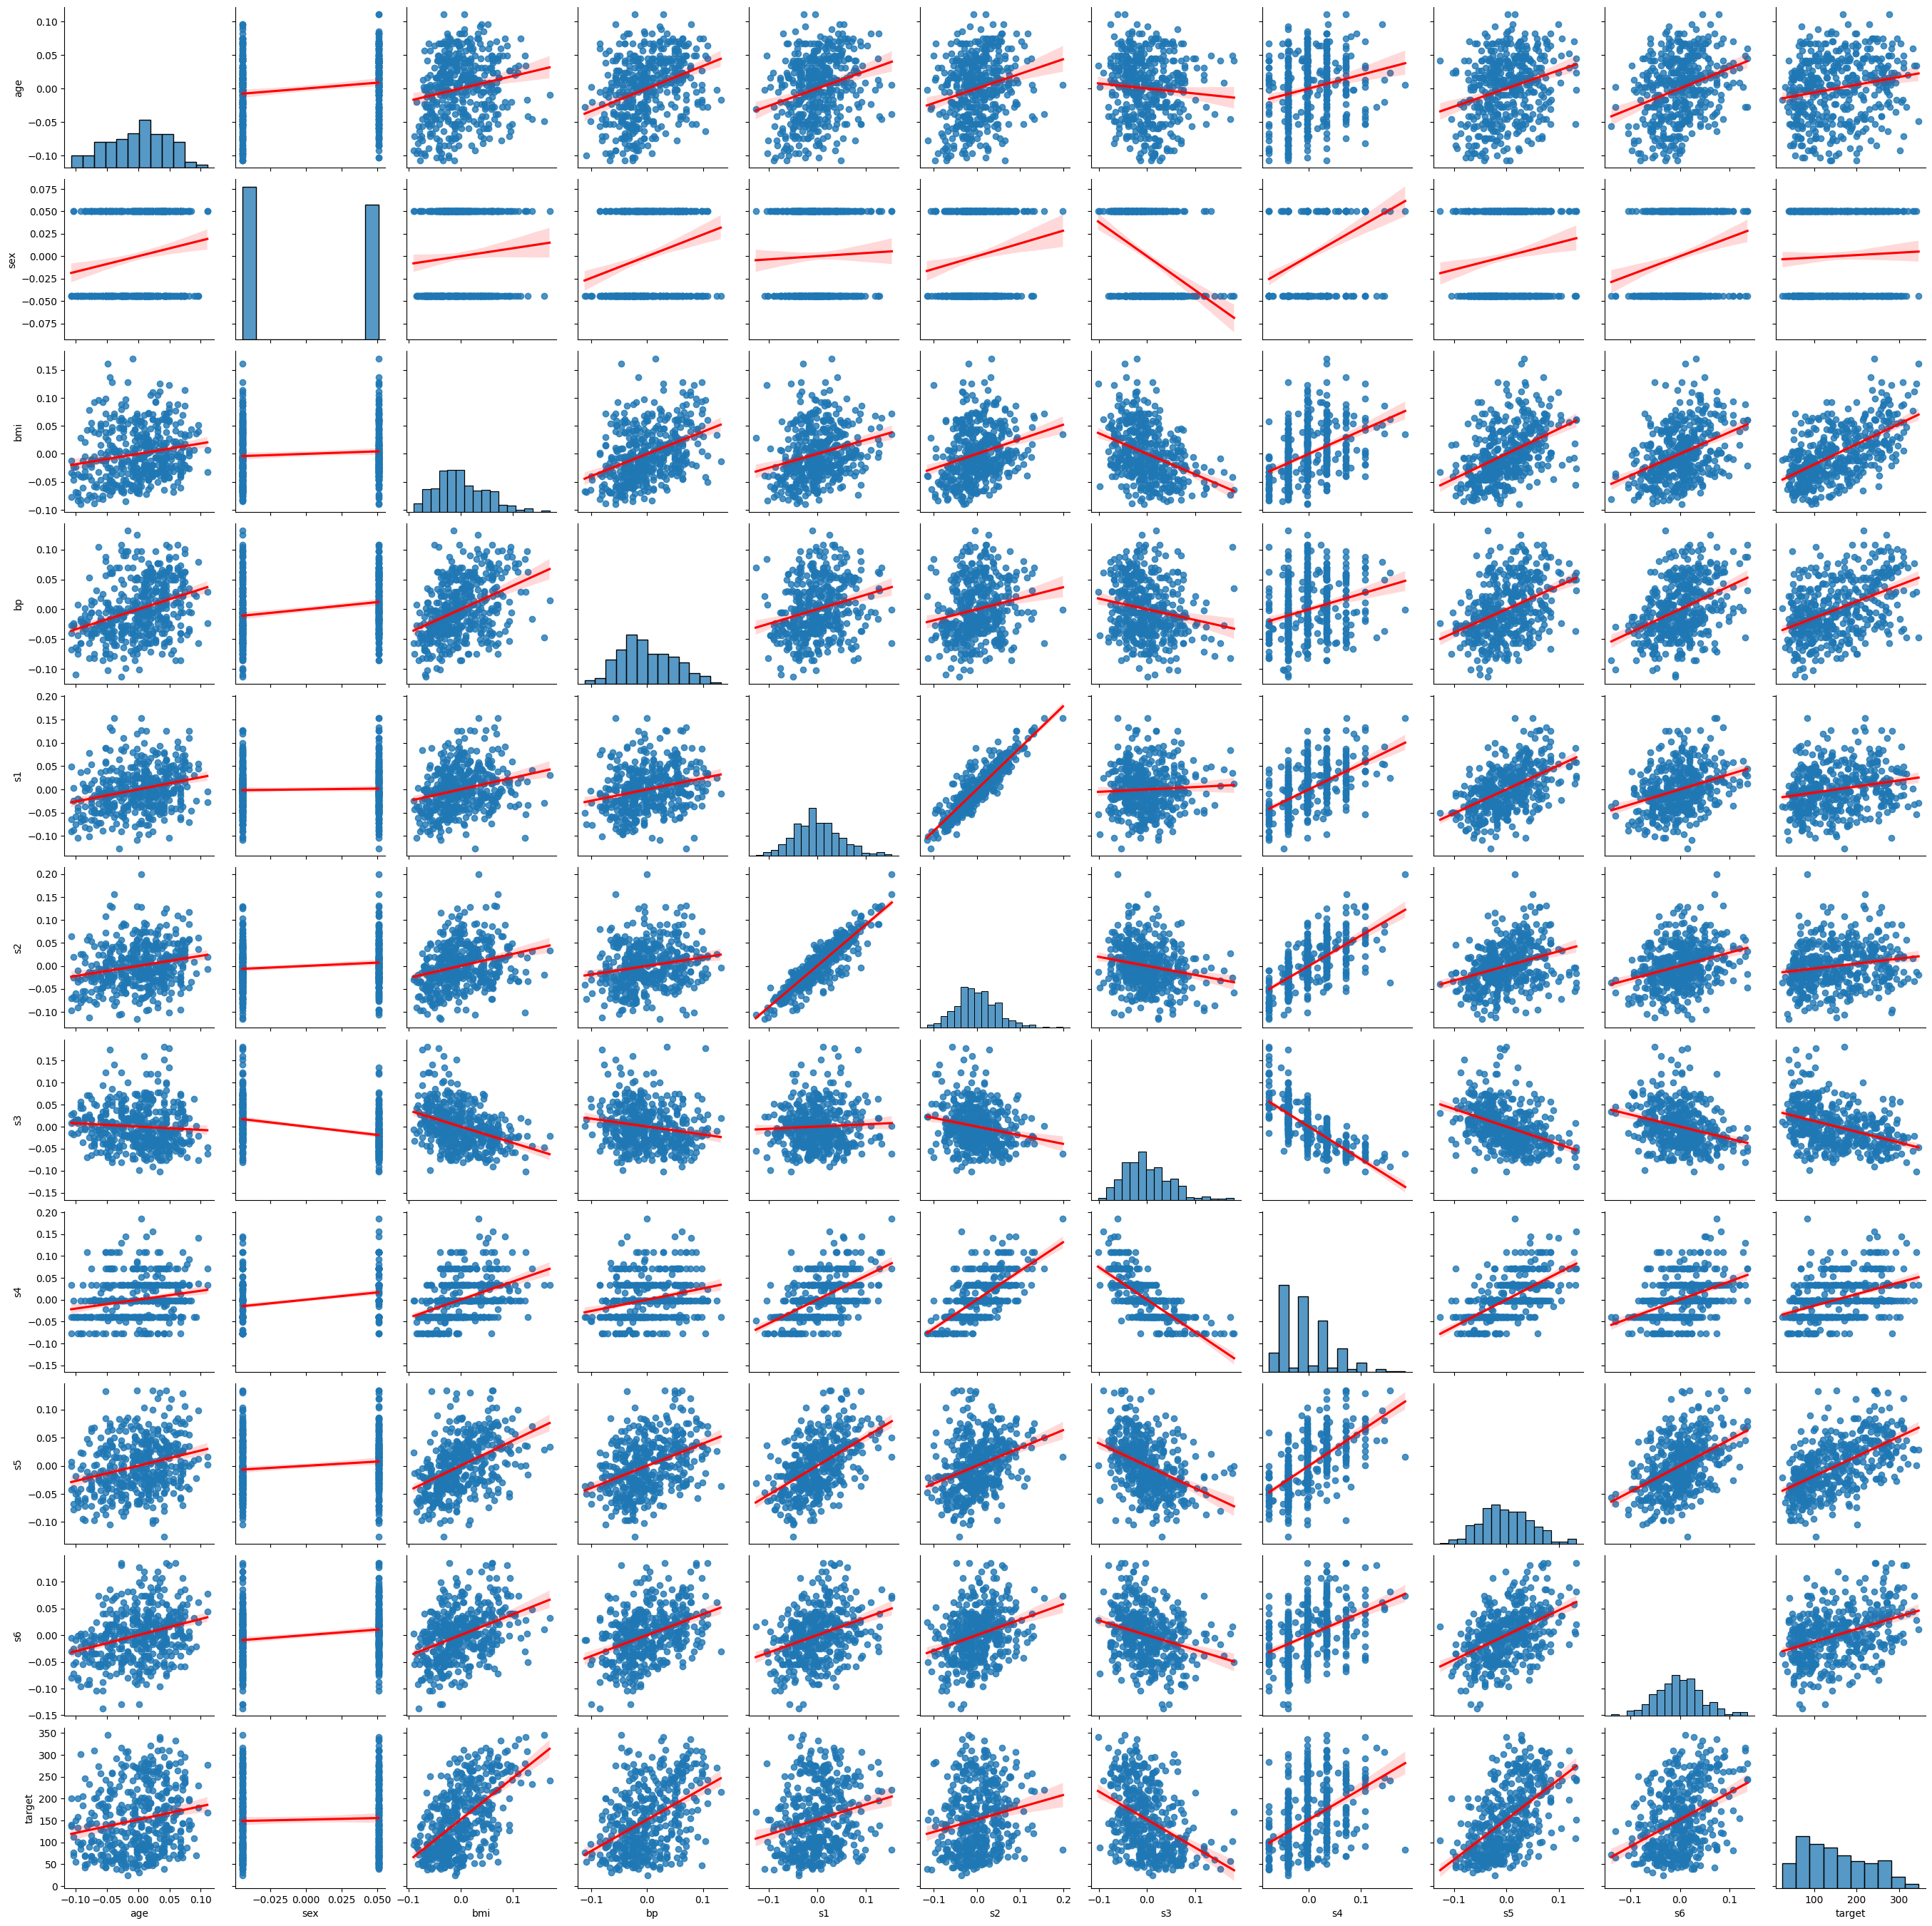

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

pair_plt = sns.pairplot(diabetes.frame, kind='reg', diag_kind='hist', plot_kws={"line_kws": {"color": "red"}});

# pair_plt.savefig('diabetes_pair_plt2.jpg')
# plt.show();


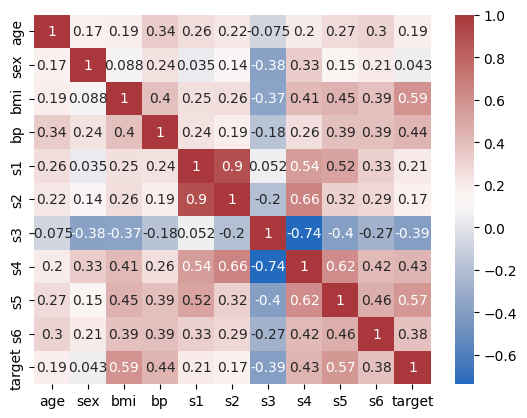

In [19]:
sns.heatmap(diabetes.frame.corr(numeric_only=True), annot=True, cmap="vlag");  # coolwarm

Fit the training data and target to `diabetes_model`. Print the *intercept* and *coefficients* of the model.

In [20]:
diabetes_model.fit(diabetes_data_train, diabetes_target_train)

LinearRegression()

Perform a brief exploratory analysis to investigate the conditions necessary for linear regression. This analysis will help you understand the distribution of the target variable and its correlations with other features.

In [21]:
print('intercept:',diabetes_model.intercept_)  # cuando x es 0 que valor tiene y (cuando cruza el y en valor de x=0)
print('coef', diabetes_model.coef_)     # dentro del modelo que pesos se le dan a cada variable

intercept: 152.76429169049118
coef [ 3.06094248e-01 -2.37635570e+02  5.10538048e+02  3.27729878e+02
 -8.14111926e+02  4.92799595e+02  1.02841240e+02  1.84603496e+02
  7.43509388e+02  7.60966464e+01]


In [22]:
import pandas as pd
coeff_df = pd.DataFrame(diabetes_model.coef_, diabetes.data.columns, columns=['Coefficient'])
coeff_df

,Coefficient
age,0.306094
sex,-237.635570
bmi,510.538048
bp,327.729878
s1,-814.111926
s2,492.799595
s3,102.841240
s4,184.603496
s5,743.509388
s6,76.096646


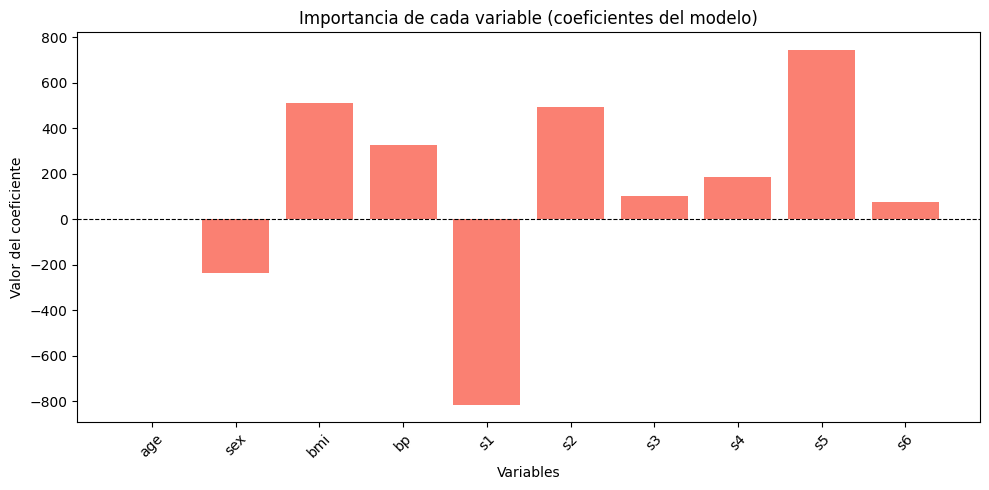

In [23]:
plt.figure(figsize=(10, 5))
plt.bar(diabetes.feature_names, diabetes_model.coef_, color='salmon')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.title("Importancia de cada variable (coeficientes del modelo)")
plt.ylabel("Valor del coeficiente")
plt.xlabel("Variables")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

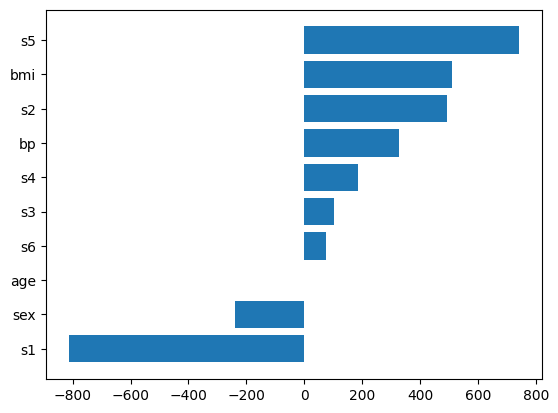

In [26]:
features_std = pd.DataFrame(diabetes_model.coef_, diabetes.data.columns, columns=['coefficient'])
features_std.sort_values('coefficient', ascending=False)

features_std = features_std.sort_values('coefficient', ascending=True)
plt.barh(features_std.index, features_std.coefficient);


#### Inspecting the results

From the outputs you should have seen:

- The intercept is a float number.
- The coefficients are an array containing 10 float numbers.

This is the linear regression model fitted to your training dataset.

#### Using your fitted linear regression model, predict the *y* of `diabetes_data_test`.

y = a + b*x1 + c*x2 + d*x3 + ....

In [47]:
predictions = diabetes_model.predict(diabetes_data_test)
predictions

array([197.61898486, 155.44031962, 172.88875144, 111.53270645,
       164.79397301, 131.06765869, 259.12441219, 100.47873746,
       117.06005372, 124.30261597, 218.36868146,  61.19581944,
       132.24837933, 120.33293546,  52.54513009, 194.03746764,
       102.5756431 , 123.56778709, 211.03465323,  52.60221696])

#### Print your `diabetes_target_test` and compare with the prediction. 

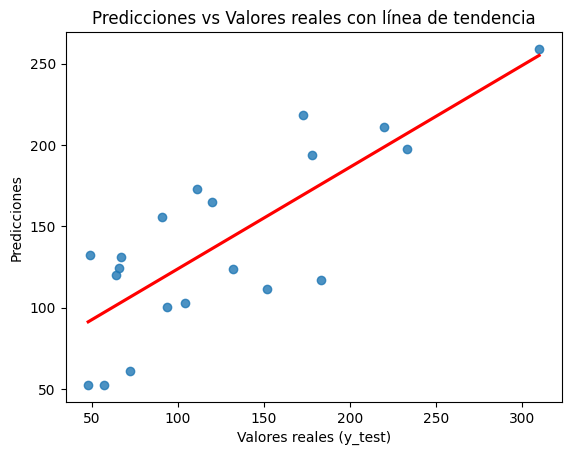

In [59]:
sns.regplot(x=diabetes_target_test, y=predictions, ci=None, line_kws={"color": "red"})
plt.xlabel("Valores reales (y_test)")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores reales con línea de tendencia")
plt.show()

In [ ]:
diabetes_target_test_vs_predict = pd.DataFrame({
    "valor_real": diabetes_target_test.values,
    'predicho': predictions
})
diabetes_target_test_vs_predict   # meter col con diferencia

,valor_real,predicho
0,233.0,197.618985
1,91.0,155.440320
2,111.0,172.888751
3,152.0,111.532706
4,120.0,164.793973
5,67.0,131.067659
6,310.0,259.124412
7,94.0,100.478737
8,183.0,117.060054
9,66.0,124.302616


#### Is `diabetes_target_test` exactly the same as the model prediction? Use different error metrics

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np
 
print("r2_score:", r2_score(diabetes_target_test, predictions))


r2_score: 0.5850854274471953


In [62]:
print('MAE:',mean_absolute_error(diabetes_target_test, predictions))
print('MSE', mean_squared_error(diabetes_target_test, predictions))
print('MAPE',mean_absolute_percentage_error(diabetes_target_test, predictions))
print('RMSE', np.sqrt( mean_squared_error(diabetes_target_test, predictions)))

MAE: 36.60961865545878
MSE 2004.5186863342085
MAPE 0.39308761028730493
RMSE 44.77185149548998
